In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3588, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,bestech altura,sector 79,1.85,8605.0,3,4,3+,11.0,New Property,1946.0,0,1,0,0,0,0,49
1,flat,rof ananda,sector 95,0.46,6319.0,2,2,2,11.0,New Property,809.0,1,0,0,0,0,0,82
2,flat,umang monsoon breeze,sector 78,0.95,5491.0,3,3,2,9.0,Relatively New,1730.0,0,0,0,0,0,1,65
3,flat,tata primanti,sector 72,4.00,13769.0,4,5,2,7.0,Moderately Old,2629.0,0,1,0,0,0,0,38
4,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,2.0,Relatively New,5200.0,0,1,1,1,0,1,114


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 79,1.85,3,4,3+,11.0,New Property,1946.0,0,1,0,0,0,0,49
1,flat,sector 95,0.46,2,2,2,11.0,New Property,809.0,1,0,0,0,0,0,82
2,flat,sector 78,0.95,3,3,2,9.0,Relatively New,1730.0,0,0,0,0,0,1,65
3,flat,sector 72,4.00,4,5,2,7.0,Moderately Old,2629.0,0,1,0,0,0,0,38
4,house,sector 66,9.00,4,4,3+,2.0,Relatively New,5200.0,0,1,1,1,0,1,114


<Axes: >

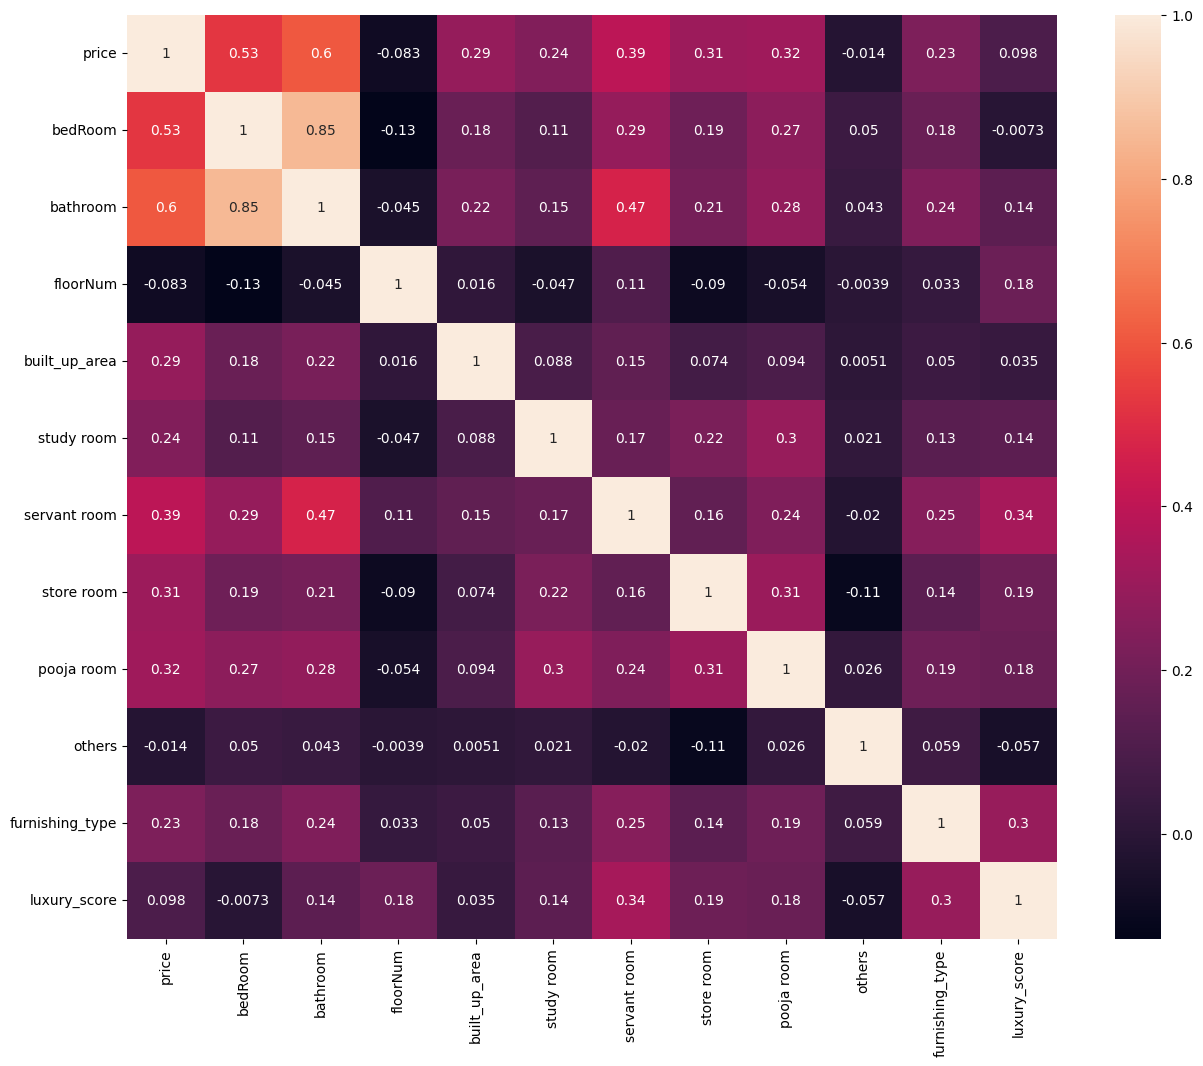

In [13]:
# Select only numeric columns
numeric_df = train_df.select_dtypes(include='number')

# Generate correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix,annot=True)

In [15]:
corr_matrix['price'].sort_values(ascending=False)


price              1.000000
bathroom           0.604208
bedRoom            0.525640
servant room       0.394794
pooja room         0.320665
store room         0.310899
built_up_area      0.291913
study room         0.241780
furnishing_type    0.230201
luxury_score       0.097976
others            -0.013967
floorNum          -0.082904
Name: price, dtype: float64

In [ ]:
# cols in question

# numerical -> luxury_score, others, floorNum
# categorical -> property_type, sector, agePossession